In [19]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('user_behavior_dataset.csv')

In [14]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [16]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [17]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [21]:
df['Age'].describe()

count    700.000000
mean      38.482857
std       12.012916
min       18.000000
25%       28.000000
50%       38.000000
75%       49.000000
max       59.000000
Name: Age, dtype: float64

In [22]:
df['Data Usage (MB/day)'].describe()

count     700.000000
mean      929.742857
std       640.451729
min       102.000000
25%       373.000000
50%       823.500000
75%      1341.000000
max      2497.000000
Name: Data Usage (MB/day), dtype: float64

In [25]:
#Creating age group, young (age <30) and old(age>30)
df['Age_Group'] = pd.cut(df['Age'], bins =[0,30,100], labels =['Young', 'Old'])
df['Age_Group'].value_counts()

Age_Group
Old      482
Young    218
Name: count, dtype: int64

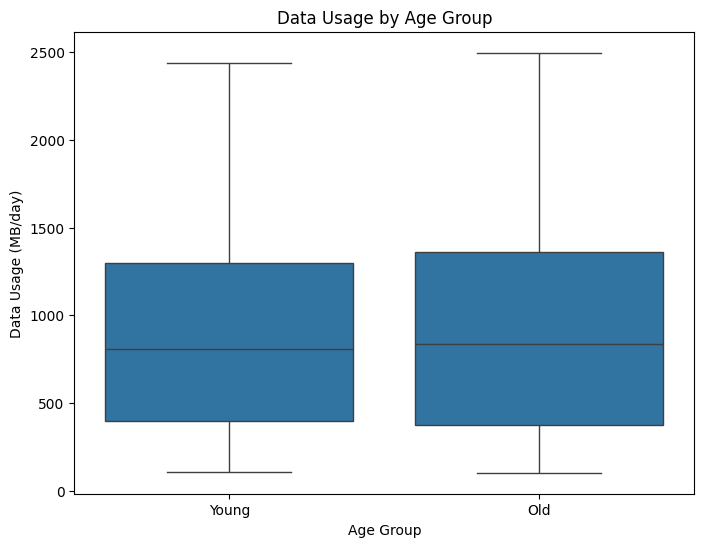

In [27]:
# Createing a box plot to visualize data usage by age group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Data Usage (MB/day)', data=df)
plt.title('Data Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Data Usage (MB/day)')
plt.show()


In [28]:
# Separate the data into two groups
younger_group = df[df['Age_Group'] == 'Young']['Data Usage (MB/day)']
older_group = df[df['Age_Group'] == 'Old']['Data Usage (MB/day)']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(younger_group, older_group)

# Output the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: -0.5771546044878624
P-value: 0.5640211193458656


In [30]:
alpha = 0.05  

# Perform your t-test and interpret results
if p_value < alpha:
    print("Reject the null hypothesis: Older people spend significantly more data than young people.")
else:
    print("Fail to reject the null hypothesis: No significant difference in data usage between age groups.")


Fail to reject the null hypothesis: No significant difference in data usage between age groups.
